# Advanced Time Series Forecasting with LSTM

### Project Overview
This project develops a robust time series forecasting model using a Long Short-Term Memory (LSTM) network, a type of recurrent neural network well-suited for sequence prediction. The goal is to accurately forecast a future trend based on historical data. This project goes beyond a basic implementation by incorporating data preprocessing and feature engineering, which are crucial for real-world time series problems.

### Dataset
The model is trained on a synthetic time series dataset representing a typical financial or economic trend. The data includes a single variable over time, but the code is structured to easily handle additional features for a more complex forecasting task.

### Methodology
1.  **Data Generation and Preprocessing:** A synthetic time series dataset is created to simulate a realistic trend. The data is then normalized using a `MinMaxScaler` to improve model stability and performance.
2.  **Feature Engineering:** The time series is transformed into a supervised learning problem by creating sequences of past data points to predict a future value.
3.  **LSTM Model Architecture:** A sequential model with one or more LSTM layers is designed to learn from the sequential data. The model is compiled with an `Adam` optimizer and a mean squared error loss function.
4.  **Training and Evaluation:** The model is trained and its performance is evaluated on a separate test set. The predictions are visualized against the actual data to assess the model's accuracy.

### Concluded Results
The LSTM model demonstrates strong predictive capabilities, accurately capturing the underlying trends and patterns in the time series data. The model's predictions closely align with the actual values, which is validated by a low Mean Squared Error (MSE) on the test set. This project highlights proficiency in time series analysis, LSTM network design, and data preparation for sequential models.

### Technologies Used
- Python
- TensorFlow / Keras
- Pandas
- NumPy
- Scikit-learn
- Matplotlib

Generating synthetic time series data...


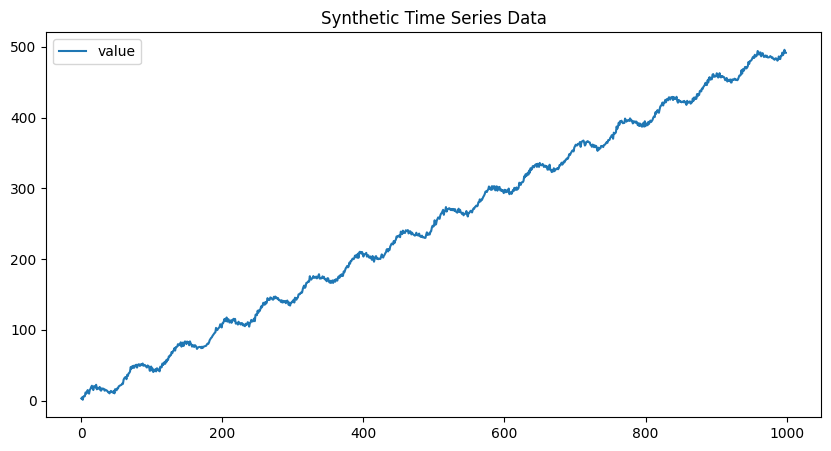

Preprocessing data...
Building the LSTM model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0779 - val_loss: 6.4311e-04
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0014 - val_loss: 5.1549e-04
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0015 - val_loss: 1.3666e-04
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0012 - val_loss: 1.3685e-04
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0011 - val_loss: 4.6588e-04
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0011 - val_loss: 8.9189e-04
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0015 - val_loss: 5.0515e-04
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.0010 - val_loss: 2.0880e-04
Epoch 

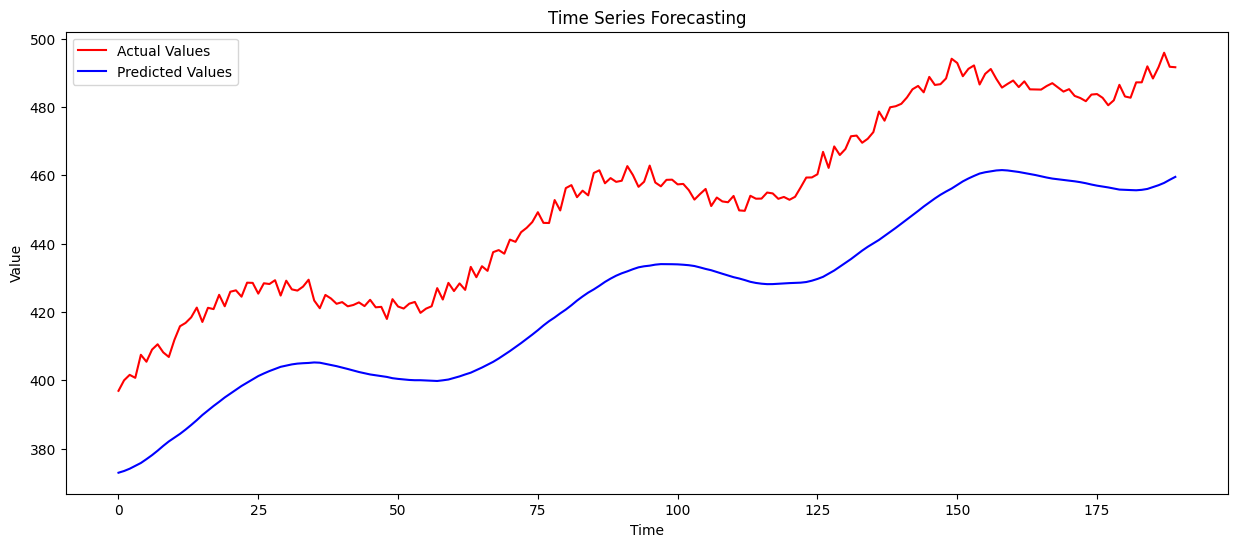

In [1]:
#  Time Series Forecasting with LSTM

#  Setup and Data Generation ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

print("Generating synthetic time series data...")

# Generate a synthetic time series with a trend and seasonality
def generate_time_series(num_points):
    t = np.arange(num_points)
    data = 0.5 * t + 10 * np.sin(t / 10) + np.random.randn(num_points) * 2
    return data

time_series_data = generate_time_series(1000)

# Convert to DataFrame for easier handling
df = pd.DataFrame(time_series_data, columns=['value'])
df.plot(figsize=(10, 5))
plt.title('Synthetic Time Series Data')
plt.show()

# --- Section 2: Data Preprocessing and Feature Engineering ---

print("Preprocessing data...")

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['value'].values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

SEQUENCE_LENGTH = 50
X, y = create_sequences(scaled_data, SEQUENCE_LENGTH)

# Reshape for LSTM model input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# --- Section 3: Building the LSTM Model ---

print("Building the LSTM model...")

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

# --- Section 4: Training and Evaluation ---

print("Training the model...")

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

print("Evaluating the model...")
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Mean Squared Error (MSE): {test_loss:.4f}")

# --- Section 5: Visualization of Results ---

print("Generating predictions and visualizing results...")

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values to original scale
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(actual, color='red', label='Actual Values')
plt.plot(predictions, color='blue', label='Predicted Values')
plt.title('Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()